In [1]:
%pylab inline
%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


# Goal

Our goal is to extend the one dimensional problem of the previous notebook, to dimensions 2 and 3. 

# Collections of one dimensional Lagrange basis functions

$$
l_i(x) := \prod_{j=0, j\neq i}^{n} \frac{x-x_j}{x_i-x_j}.
$$

In [2]:
from numpy.polynomial.polynomial import Polynomial
from numpy.testing import *

We condisder a `dim`-dimensional problem. We setup a one dimensional set of basis finctions along each of `dim` direction. The first two lines in the previous notebook:
```
n = 6
q = linspace(0,1,n)
```
are substituted with two lists:
$$
\mathtt{N = [} \mathtt{n}_1,\mathtt{n}_2,\ldots, \mathtt{n}_{\mathtt{dim}}\mathtt{]}\\
\mathtt{Q = [[} \mathtt{q}_0,\ldots \mathtt{q}_{\mathtt{n}_1}\mathtt{]}\ldots\mathtt{[}\mathtt{q}_0,\ldots \mathtt{q}_{\mathtt{n}_{\mathtt{dim}}}\mathtt{]}\mathtt{]}
$$

In [3]:
dim = 2
N = [6,7] # same size as dim
assert_equal(dim,len(N))
Q = [linspace(0,1,n) for n in N]

The list `Q` is automatically generated by the program with the correct dimensionality. `dim`, and `N` can be seen as input parameters that the user has to set in a coherent way. Tho check that we equip this section of the program with an *assertion*. An assertion is an useful that throws an error to defend the program to possible mistakes. The line:
```
assert_equal(dim,len(N))
```
throws an error in case the length of `N` does not match `dim`.

In [4]:
print(Q[0])

[ 0.   0.2  0.4  0.6  0.8  1. ]


We prepare a list `LL` we expect it to have `len(LL) = dim`. For each dimension we populate it with the set of basis functions along the corresponding dimension.

In [5]:
LL = []
for d in range(dim):
    n = N[d]
    q = Q[d]
    LL += [[Polynomial.fromroots([xj for xj in q if xj != q[i]]) for i in range(n)]]

Only for the brave:
```
LL = []
for n,q in zip(N,Q):
    LL += [[Polynomial.fromroots([xj for xj in q if xj != q[i]]) for i in range(n)]]
```

In [6]:
for d in range(dim):
    n = N[d]
    q = Q[d]
    L = LL[d]
    LL[d] = [L[i]/L[i](q[i]) for i in range(n)]

Only for the brave:
```
for n,q,L in zip(N,Q,LL):
    LL[d] = [L[i]/L[i](q[i]) for i in range(n)]
```

It is good idea to prepare lists for first and second derivatives of the basis functions. Depending on the problem formulation we will use the appropriate ones.

In [7]:
LL_prime = []
for d in range(dim):
    n = N[d]
    q = Q[d]
    L = LL[d]
    LL_prime += [[L[i].deriv() for i in range(n)]]

The brave version:
```
for L,n in zip(LL,N):
    LL_prime += [[L[i].deriv() for i in range(n)]]
```

In [8]:
LL_prime_prime = []
for d in range(dim):
    n = N[d]
    q = Q[d]
    L_prime = LL_prime[d]
    LL_prime_prime += [[L_prime[i].deriv() for i in range(n)]]

Try your own *brave* version...

<IPython.core.display.Javascript object>


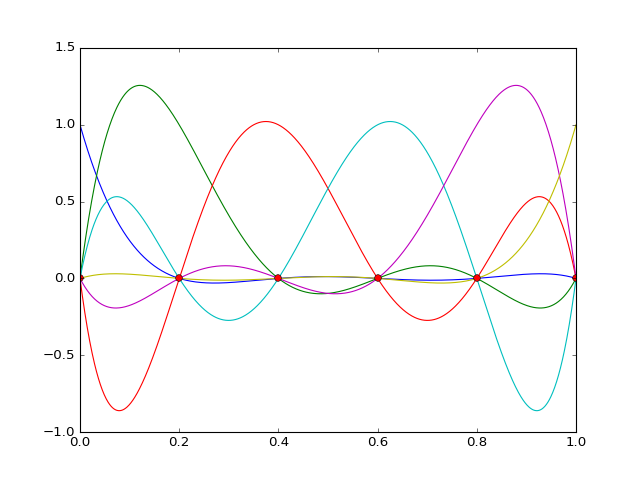

<IPython.core.display.Javascript object>


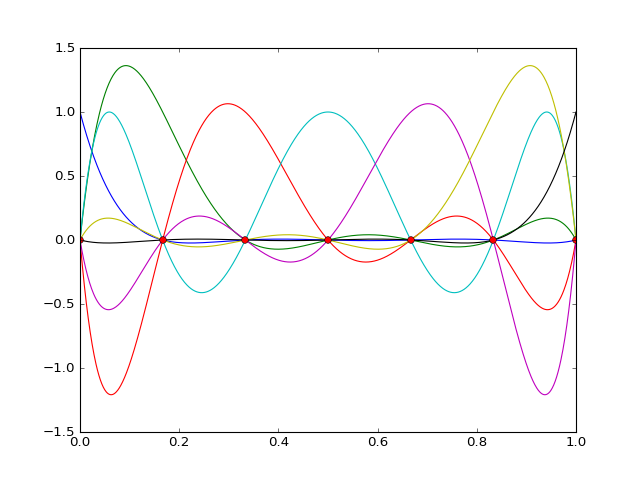

In [9]:
x = linspace(0,1,1025)
for d in range(dim):
    L = LL[d]
    q = Q[d]
    n = N[d]
    figure()
    for f in L:
        plot(x, f(x))
    plot(q, 0*q, 'ro')
    show()

# Two dimensional problems

Let's start by understanding **Tensor Product** structures

In [10]:
x = linspace(0,1,101)
y = linspace(0,1,201)

Let's define a **scalar function of two variables**:

In [11]:
g = lambda x,y: sin(2*pi*x)*cos(2*pi*y)

If you want to evaluate this function on **x** and **y**, for all combinations of the various x and y, then you have to make sure you **broadcast** them to have the same size. The following does exactly this:

In [13]:
Ge = zeros((len(y), len(x)))
for i in range(len(x)):
    for j in range(len(y)):
        Ge[j,i] = g(x[i], y[j])

In [14]:
X, Y = meshgrid(x,y) 
Gnumpy = g(X,Y)

error = Gnumpy-Ge
norm(error)

0.0

## Plotting 3d plots

A quick search on google gives us the following option:

<IPython.core.display.Javascript object>


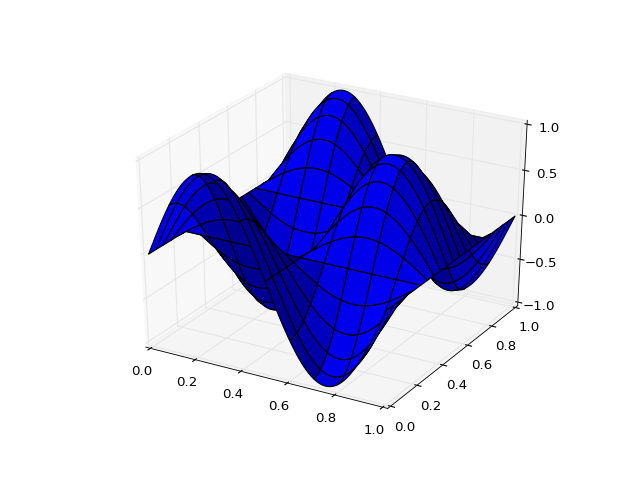

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,g(X,Y))

# Einstein notation in numpy

As python is a powerful language, especially in resembling the mathematical language, we expect its libraries to have powerful tools. We recommend the user to check [`einsum`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.einsum.html#numpy.einsum) documentation. Here we limit the discussion to the most meaningful examples.

In [16]:
a = arange(25).reshape(5,5)
b = arange(5)

In [18]:
print(einsum('ij', a))
print(einsum('ji', a))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0  5 10 15 20]
 [ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]]


In [19]:
print(einsum('ij,j', a, b))
print(np.dot(a, b))

[ 30  80 130 180 230]
[ 30  80 130 180 230]


In [20]:
z = arange(5)
w = arange(6)
print(einsum('i...->i', z))
print(einsum('i,j', z,w))
print(einsum('i,j -> ij', z,w))
print(einsum('i,j -> ji', z,w))

[0 1 2 3 4]
[[ 0  0  0  0  0  0]
 [ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]
 [ 0  4  8 12 16 20]]
[[ 0  0  0  0  0  0]
 [ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]
 [ 0  4  8 12 16 20]]
[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]
 [ 0  4  8 12 16]
 [ 0  5 10 15 20]]


Use the `einsum` command for a smarter way to plot tensor product functions, remember that tensor product functions are of the form `g1(x)*g2(y)`

<IPython.core.display.Javascript object>


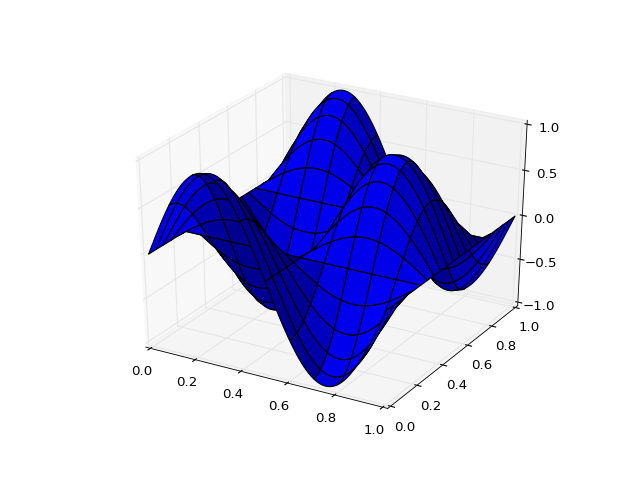

In [21]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

F = einsum('i,j -> ji', sin(2*pi*x), cos(2*pi*y))

ax.plot_surface(X,Y,F)

Try plotting $g(x,y) := l_3(x) l_4(y)$

<IPython.core.display.Javascript object>


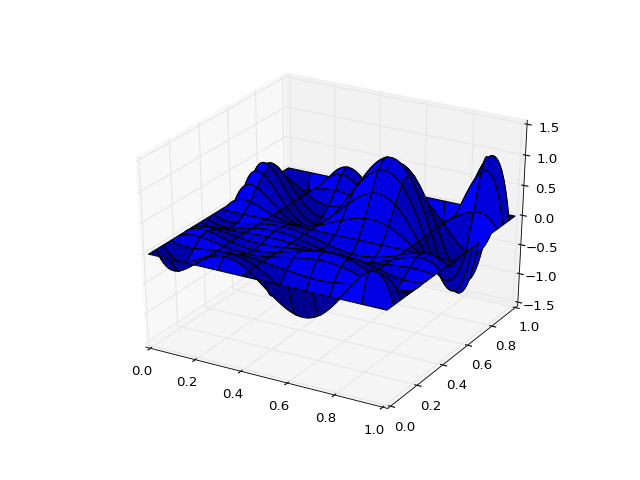

In [22]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

F = einsum('i,j -> ji', LL[0][3](x), LL[1][4](y))

ax.plot_surface(X,Y,F)

# A two dimensional problem (without bc!)

Consider the following problem
$$
-\Delta u + u = f(s) \text{ in } [0,1]\times[0,1]
$$

And solve it using a tensor product vector space:

$$
V_h := \text{span} \{v_{ij}\}_{i,j = 0}^{n}, \qquad v_{ij}(\mathbf{x}) := l_i(x_1)l_j(x_2)
$$

a function in $V_h$ can be seen as a linear combination of $n_1\times n_2$ coeffients times the basis functions, and can be "unrolled" in a vector of dimension $1\times n_1 n_2$ or $n_1n_2 \times 1$ by a simple reshape, or by a `flatten` operation.

$$
u_h(x) := u^{ij}v_{ij} (x)
$$

and the Laplacian of $v_{ij}$ can be computed simply by:
$$
\Delta v_{ij}(x) := l_i''(x_1)l_j''(x_2)
$$

Now let's use $a,b,c,d$ for indices running over **collocation points** and $i,j,k,l,m$ for indices running over basis function indices.


Start by computing 
$$
A_{ib} := l_i(q_b)
$$
$$
B_{ib} := l'_i(q_b)
$$
$$
C_{ib} := l''_i(q_b)
$$

In [23]:
AA = []
BB = []
CC = []
for d in range(dim):
    n = N[d]
    L = LL[d]
    q = Q[d]
    L_prime = LL_prime[d]
    L_prime_prime = LL_prime_prime[d]
    
    A = zeros((n, n))
    B = zeros((n, n))
    C = zeros((n, n))
    for i in range(n):
        A[:,i] = L[i](q)
        B[:,i] = L_prime[i](q)
        C[:,i] = L_prime_prime[i](q)
    AA += [A]
    BB += [B]
    CC += [C]

(6, 7, 6, 7)


<IPython.core.display.Javascript object>


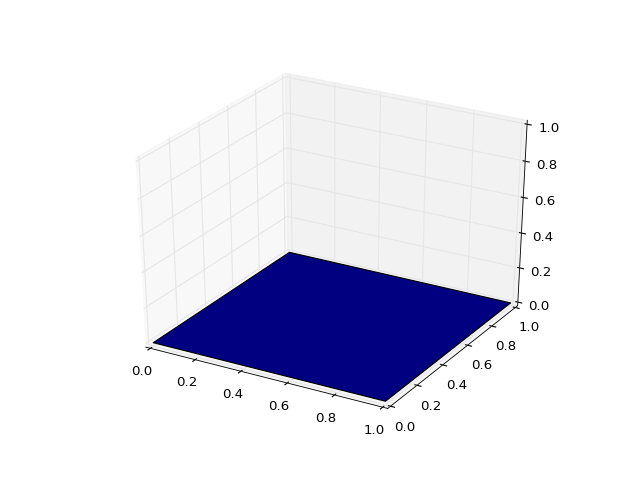

In [64]:
L1 = einsum('ia,jb -> abij', CC[0], AA[1])
L2 = einsum('ia,jb -> abij', AA[0], CC[1])
M = einsum('ia,jb -> abij', AA[0], AA[1])

S = - L1 - L2 + M
print(S.shape)

Ss = S.reshape((N[0] * N[1], -1))

Qx, Qy = meshgrid(Q[1], Q[0])

g = lambda x, y: sin(pi*x) * sin(pi*y)
G = g(Qx, Qy).flatten()

u = solve(Ss, G)
U = u.reshape((N[0], N[1]))

f = arange(N[0] * N[1])
F = f.reshape((N[0], N[1]))
mask = where(g(Qx, Qy) > 0.)

fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Qx, Qy, g(Qx, Qy))

# x = Ss.dot(f)
# X = einsum('ijkl, kl', S, F)

# print(norm(x - X.flatten()))

In [46]:
#ar = arange(10).reshape(1,-1)
#br = (ar*10).reshape(-1, 1)
ar = arange(10)
br = ar*10

cr = ar[newaxis,:] + br[:,newaxis]
print(cr.flatten())
#new = ar + br
#print(new)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [48]:
ar = arange(3*3*3*3)
ar = ar.reshape((3,3,3,3))

print(ar[0, 0, :, :])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
